# Initialization of libraries 

In [2]:
import matplotlib.pyplot as plt

from qiskit import IBMQ, BasicAer, Aer
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute 

from qiskit.tools.visualization import plot_histogram, plot_bloch_multivector

# Two qbits adder

_I rewrtied algorithm to decrease amount of procedures in code_


                                             Logical expectation:
| A (input) | B (input) | Z (zero symbol of value) | F (first symbol of value) |
| ----------- | ------------ | ------------ | ----------- - |
| 0 | 0 | 0 | 0 |
| 0 | 1 | 1 | 0 |
| 1 | 0 | 1 | 0 |
| 1 | 1 | 0 | 1 |

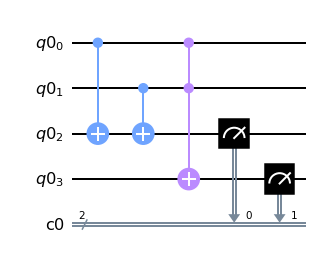

In [3]:
#set up qbits 
qbits = QuantumRegister(4)
#set up outputs 
outputs = ClassicalRegister(2)

quantum_circut = QuantumCircuit(qbits, outputs)

#make a junction between first||second qbit and "zero" output
quantum_circut.cx(qbits[0], qbits[2])
quantum_circut.cx(qbits[1], qbits[2])

#make a junction between first&&second qbit and "first" output
quantum_circut.ccx(qbits[0], qbits[1], qbits[3])


#make an output 
quantum_circut.measure(qbits[2], outputs[0])
quantum_circut.measure(qbits[3], outputs[1])

#make a computation 
backend = Aer.get_backend('qasm_simulator')
result = execute(quantum_circut, backend, shots= 1000).result()

#show a result
"""
#count = result.get_counts()
#plot_histogram(count)
"""

#make a vizualization
quantum_circut.draw(output="mpl")

# Three qbits adder 

_A new created implementation of 3-qbits adder based on 2-qbits one_

                                             Logical expectation:
| A (input) | B (input) | C (input) | Z (zero symbol of value) | F (first symbol of value) |
| -----------| ----------- | ------------ | ------------ | ----------- - |
| 0 | 0 | 0 | 0 | 0 |
| 0 | 0 | 1 | 1 | 0 |
| 0 | 1 | 0 | 1 | 0 |
| 1 | 0 | 0 | 1 | 0 |
| 0 | 1 | 1 | 0 | 1 |
| 1 | 0 | 1 | 0 | 1 |
| 1 | 1 | 0 | 0 | 1 |
| 1 | 1 | 1 | 1 | 1 |

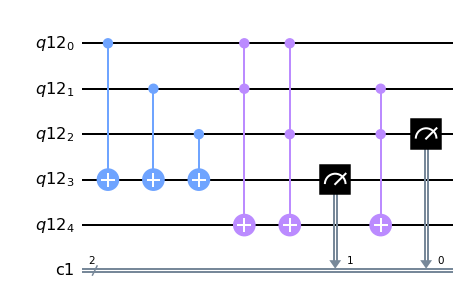

In [4]:
#set up qbits 
qbits = QuantumRegister(5)
#set up outputs 
outputs = ClassicalRegister(2)

quantum_circut = QuantumCircuit(qbits, outputs)

#make a junction between liner combinations qbit and "zero" output
quantum_circut.cx(qbits[0], qbits[3])
quantum_circut.cx(qbits[1], qbits[3])
quantum_circut.cx(qbits[2], qbits[3])

#make a junction between two combinations and "first" output
quantum_circut.ccx(qbits[0], qbits[1], qbits[4])
quantum_circut.ccx(qbits[0], qbits[2], qbits[4])
quantum_circut.ccx(qbits[1], qbits[2], qbits[4])

#make an output 
quantum_circut.measure(qbits[2], outputs[0])
quantum_circut.measure(qbits[3], outputs[1])

#make a computation 
backend = Aer.get_backend('qasm_simulator')
result = execute(quantum_circut, backend, shots= 1000).result()

#show a result
"""
#count = result.get_counts()
#plot_histogram(count)
"""

#make a vizualization
quantum_circut.draw(output="mpl")

# Three Rooks Problem Solution:
_I used a such algorithm:_
1. To create 9 qbits with superposition (through Hadamard gates)
2. After, calculate sum of each row and column in Matrix of combinations
3. Next, create an Oracle that yields 1 if all six sums are equal each other and zero themselves 
4. At last, use diffusion gate (two times) to find out right Rooks combinations over Chess Plate
5. And then, display all right combinations 

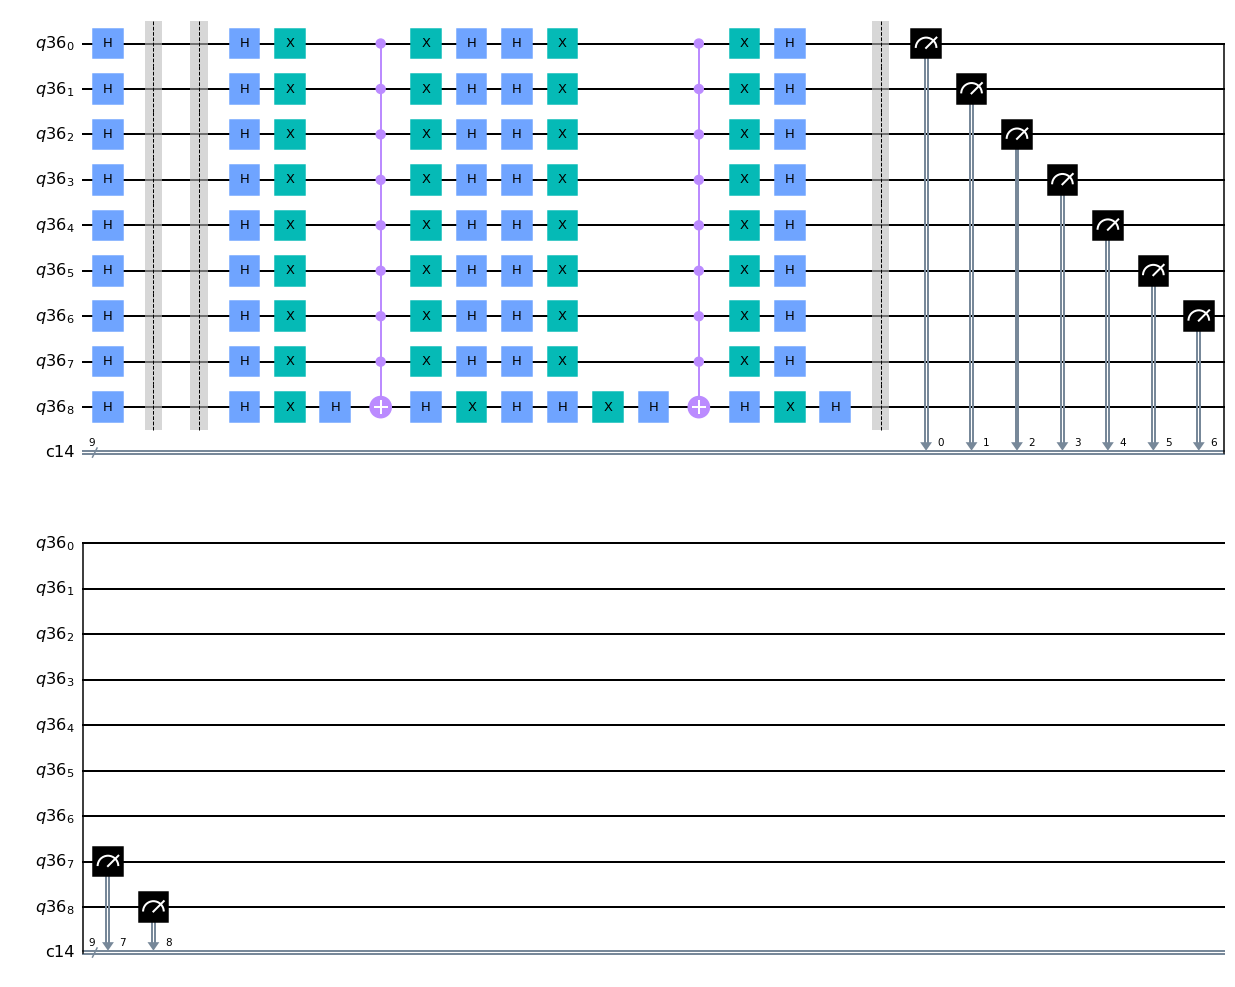

In [17]:
def diffusion_gate(circuit, register):
    circuit.h(register)
    circuit.x(register)
    circuit.h(register[-1])
    circuit.mct(register[0:-1], register[-1])
    circuit.h(register[-1])
    circuit.x(register)
    circuit.h(register)

#set up working qbits and outputs
qbits = QuantumRegister(9)
outputs = ClassicalRegister(9)
#create a circut 
quantum_circut = QuantumCircuit(qbits, outputs)

#put all qbits into superposition
quantum_circut.h(qbits)

#just separate different parts of code 
quantum_circut.barrier()

#
#
#
# Enter your code here 
#
#
#

#just separate different parts of code 
quantum_circut.barrier()

#use diffusion gate after Oracle 
diffusion_gate(quantum_circut, qbits)
diffusion_gate(quantum_circut, qbits)

quantum_circut.barrier()
quantum_circut.measure(qbits, outputs)
quantum_circut.draw(output="mpl")